<a href="https://colab.research.google.com/github/juanpalominoh/Fundamentos-de-Econometria/blob/main/Tema_8_Web_Scraping_sobre_datos_del_BCRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping sobre datos del BCRP**

In [ ]:
# Instalar paquetes
install.packages("lubridate")
install.packages("rvest", dependencies = T)
install.packages("glue")
install.packages("xml2")
install.packages("stringr")
install.packages("zoo")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘Rcpp’, ‘rex’, ‘hunspell’, ‘covr’, ‘repurrrsive’, ‘spelling’, ‘webfakes’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)
library(glue)
library(rvest)
library(xml2)
library(stringr)
library(zoo)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




# **Datos de Término de Intercambio**

La información se puede visualizar en el siguiente link: 
https://estadisticas.bcrp.gob.pe/estadisticas/series/trimestrales/terminos-de-intercambio-de-comercio-exterior-indice-2007-100-t-bpm6

In [ ]:
# Descargamos la página web
download_html(url ="https://estadisticas.bcrp.gob.pe/estadisticas/series/trimestrales/resultados/PN10029BQ/html",
              file="terminos_intercambio.html")

In [ ]:
# Leemos el archivo descargado
archivo_ti <- read_html("/content/terminos_intercambio.html", 
                                     encoding = "UTF-8")

Extraer la información con html_nodes y html_text

In [ ]:
term_int <- archivo_ti %>% 
  html_nodes(".dato") %>% 
  html_text()

term_int <- as.numeric(substring(term_int, first=13, last=18))
term_int

[1]  59.1  55.4  53.2  53.0  53.5  54.7  56.5  58.5  61.0  58.5  60.6  59.9
 [13]  59.0  59.3  55.5  57.7  60.4  62.1  63.6  60.4  59.9  61.3  60.1  56.5
 [25]  57.0  54.1  54.9  57.0  56.4  54.8  55.3  53.9  54.7  54.2  54.6  55.8
 [37]  57.6  58.8  58.9  60.1  58.4  57.5  60.3  63.8  68.7  69.8  66.7  68.8
 [49]  69.7  72.2  72.4  76.1  83.2  95.8  98.0  99.6  99.3 105.3 100.0  95.9
 [61]  96.5  93.5  86.4  75.1  77.1  81.9  87.1  96.1  99.6 102.8 103.1 109.4
 [73] 113.4 113.0 114.3 107.4 111.0 107.7 106.9 109.5 109.4 101.5  99.6  98.5
 [85]  97.5  95.0  97.7  96.6  92.8  92.3  87.9  87.4  86.5  88.2  91.2  93.5
 [97]  93.6  92.7  97.5 102.7 101.6  98.1  92.6  92.9  93.1  94.7  96.0  94.6
[109]  96.7  97.0 107.3 111.7 115.5 115.9 114.3 116.0

In [ ]:
fecha <- archivo_ti %>% 
  html_nodes(".periodo") %>% 
  html_text()

fecha <- substring(str_remove(fecha, pattern="\n"), first=13, last=16)
fecha

[1] "T193" "T293" "T393" "T493" "T194" "T294" "T394" "T494" "T195" "T295"
 [11] "T395" "T495" "T196" "T296" "T396" "T496" "T197" "T297" "T397" "T497"
 [21] "T198" "T298" "T398" "T498" "T199" "T299" "T399" "T499" "T100" "T200"
 [31] "T300" "T400" "T101" "T201" "T301" "T401" "T102" "T202" "T302" "T402"
 [41] "T103" "T203" "T303" "T403" "T104" "T204" "T304" "T404" "T105" "T205"
 [51] "T305" "T405" "T106" "T206" "T306" "T406" "T107" "T207" "T307" "T407"
 [61] "T108" "T208" "T308" "T408" "T109" "T209" "T309" "T409" "T110" "T210"
 [71] "T310" "T410" "T111" "T211" "T311" "T411" "T112" "T212" "T312" "T412"
 [81] "T113" "T213" "T313" "T413" "T114" "T214" "T314" "T414" "T115" "T215"
 [91] "T315" "T415" "T116" "T216" "T316" "T416" "T117" "T217" "T317" "T417"
[101] "T118" "T218" "T318" "T418" "T119" "T219" "T319" "T419" "T120" "T220"
[111] "T320" "T420" "T121" "T221" "T321" "T421"

In [ ]:
# Extraer año
year <- substring(fecha, first=3, last=4)
year <- as.Date(year, "%y")
year <- substring(year, first=1, last=4)
year

[1] "1993" "1993" "1993" "1993" "1994" "1994" "1994" "1994" "1995" "1995"
 [11] "1995" "1995" "1996" "1996" "1996" "1996" "1997" "1997" "1997" "1997"
 [21] "1998" "1998" "1998" "1998" "1999" "1999" "1999" "1999" "2000" "2000"
 [31] "2000" "2000" "2001" "2001" "2001" "2001" "2002" "2002" "2002" "2002"
 [41] "2003" "2003" "2003" "2003" "2004" "2004" "2004" "2004" "2005" "2005"
 [51] "2005" "2005" "2006" "2006" "2006" "2006" "2007" "2007" "2007" "2007"
 [61] "2008" "2008" "2008" "2008" "2009" "2009" "2009" "2009" "2010" "2010"
 [71] "2010" "2010" "2011" "2011" "2011" "2011" "2012" "2012" "2012" "2012"
 [81] "2013" "2013" "2013" "2013" "2014" "2014" "2014" "2014" "2015" "2015"
 [91] "2015" "2015" "2016" "2016" "2016" "2016" "2017" "2017" "2017" "2017"
[101] "2018" "2018" "2018" "2018" "2019" "2019" "2019" "2019" "2020" "2020"
[111] "2020" "2020" "2021" "2021" "2021" "2021"

In [ ]:
# Extraer trimestre
trimestre <- paste0("q", substring(fecha, first=2, last=2))
trimestre

[1] "q1" "q2" "q3" "q4" "q1" "q2" "q3" "q4" "q1" "q2" "q3" "q4" "q1" "q2" "q3"
 [16] "q4" "q1" "q2" "q3" "q4" "q1" "q2" "q3" "q4" "q1" "q2" "q3" "q4" "q1" "q2"
 [31] "q3" "q4" "q1" "q2" "q3" "q4" "q1" "q2" "q3" "q4" "q1" "q2" "q3" "q4" "q1"
 [46] "q2" "q3" "q4" "q1" "q2" "q3" "q4" "q1" "q2" "q3" "q4" "q1" "q2" "q3" "q4"
 [61] "q1" "q2" "q3" "q4" "q1" "q2" "q3" "q4" "q1" "q2" "q3" "q4" "q1" "q2" "q3"
 [76] "q4" "q1" "q2" "q3" "q4" "q1" "q2" "q3" "q4" "q1" "q2" "q3" "q4" "q1" "q2"
 [91] "q3" "q4" "q1" "q2" "q3" "q4" "q1" "q2" "q3" "q4" "q1" "q2" "q3" "q4" "q1"
[106] "q2" "q3" "q4" "q1" "q2" "q3" "q4" "q1" "q2" "q3" "q4"

In [ ]:
df_ti <- tibble(
  fecha = paste0(year,trimestre),
  ti  = term_int
  )

df_ti$fecha <- as.yearqtr(df_ti$fecha,format="%Yq%q")
#df_pbi$fecha <- as.Date(df_ti$date)
df_ti

fecha,ti
<yearqtr>,<dbl>
1993 Q1,59.1
1993 Q2,55.4
1993 Q3,53.2
1993 Q4,53.0
1994 Q1,53.5
1994 Q2,54.7
1994 Q3,56.5
1994 Q4,58.5
1995 Q1,61.0


# **Descargar data masiva del PBI por tipo de gasto**

La información se extrae de la siguiente página:
https://estadisticas.bcrp.gob.pe/estadisticas/series/trimestrales/producto-bruto-interno-por-tipo-de-gasto-mill-soles-del-2007-t

In [ ]:
# Descargar varias paginas del sitio web
walk(.x = c(28:34, 36:38),
     .f = ~ {
       download_html(
         url  = glue("https://estadisticas.bcrp.gob.pe/estadisticas/series/trimestrales/resultados/PN025{.x}AQ/html"),
         file = glue("pbi_tipogasto_{.x}.html"))
     })

In [ ]:
# Función personalizada
f_procesar_sitio <- function(file){
  web <- xml2::read_html(file, encoding = "UTF-8")
    
  # Valores
  valores <- web %>%
    html_nodes(".dato") %>%
    html_text

  valores <- substring(valores, first=13, last=20)

  # Fecha
  fecha <- web %>% 
  html_nodes(".periodo") %>% 
  html_text()
  
  fecha <- substring(str_remove(fecha, pattern="\n"), first=13, last=16)

  # Extraer año
  year <- substring(fecha, first=3, last=4)
  year <- as.Date(year, "%y")
  year <- substring(year, first=1, last=4)

  # Extraer trimestre
  trimestre <- paste0("q", substring(fecha, first=2, last=2))

  # Tabla
  df_info <- tibble(
  date   = paste0(year,trimestre),
  valor  = as.numeric(valores)
  )
  
  return(df_info)
}

In [ ]:
f_procesar_sitio(file = "/content/pbi_tipogasto_38.html")

date,valor
<chr>,<dbl>
1979q1,34514
1979q2,40882
1979q3,40671
1979q4,42183
1980q1,36357
1980q2,43102
1980q3,42344
1980q4,45792
1981q1,39026


In [ ]:
# Listar los archivos earthquakes
archivos <- list.files("/content", full.names = F, pattern = "pbi_tipogasto*")
archivos

[1] "pbi_tipogasto_28.html" "pbi_tipogasto_29.html" "pbi_tipogasto_30.html"
 [4] "pbi_tipogasto_31.html" "pbi_tipogasto_32.html" "pbi_tipogasto_33.html"
 [7] "pbi_tipogasto_34.html" "pbi_tipogasto_36.html" "pbi_tipogasto_37.html"
[10] "pbi_tipogasto_38.html"

In [ ]:
# Se construye la base de datos de earthquake
df   <- map_dfc(.x = archivos,
                .f = ~ {
                f_procesar_sitio(.x)
        })

New names:
• `date` -> `date...1`
• `valor` -> `valor...2`
• `date` -> `date...3`
• `valor` -> `valor...4`
• `date` -> `date...5`
• `valor` -> `valor...6`
• `date` -> `date...7`
• `valor` -> `valor...8`
• `date` -> `date...9`
• `valor` -> `valor...10`
• `date` -> `date...11`
• `valor` -> `valor...12`
• `date` -> `date...13`
• `valor` -> `valor...14`
• `date` -> `date...15`
• `valor` -> `valor...16`
• `date` -> `date...17`
• `valor` -> `valor...18`
• `date` -> `date...19`
• `valor` -> `valor...20`


In [ ]:
# Renombrar variables
df <- df %>% 
  rename(fecha='date...1', 
         demanda_int='valor...2',
         cons_priv  ='valor...4',
         cons_publ  ='valor...6',
         inv_bruint ='valor...8',
         inv_bruf   ='valor...10',
         inv_priv   ='valor...12',
         inv_publ   ='valor...14',
         export     ='valor...16',
         import     ='valor...18',
         pbi        ='valor...20') %>%
  select(-contains("date"))

# Aplicar formato fecha
df$fecha <- as.yearqtr(df$fecha,format="%Yq%q")
df

fecha,demanda_int,cons_priv,cons_publ,inv_bruint,inv_bruf,inv_priv,inv_publ,export,import,pbi
<yearqtr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1979 Q1,30250,23549,5084,2101,4943,3728,1160,7368,3647,34514
1979 Q2,36274,22797,4612,8827,5599,3886,1739,7878,4136,40882
1979 Q3,36418,25670,4863,6378,6444,4483,1997,8322,4738,40671
1979 Q4,37080,24810,4584,7982,6622,4217,2420,8894,4756,42183
1980 Q1,33838,24239,6646,2953,6689,4542,2147,7886,5367,36357
1980 Q2,42208,24316,6064,11828,7888,5682,2206,7449,6555,43102
1980 Q3,41697,27480,5765,8452,7310,5321,1989,6788,6141,42344
1980 Q4,45355,28587,5710,11058,9561,6225,3336,7623,7187,45792
1981 Q1,38369,28250,6374,3745,8457,6349,2107,7675,7018,39026


# **Unir bases de datos**

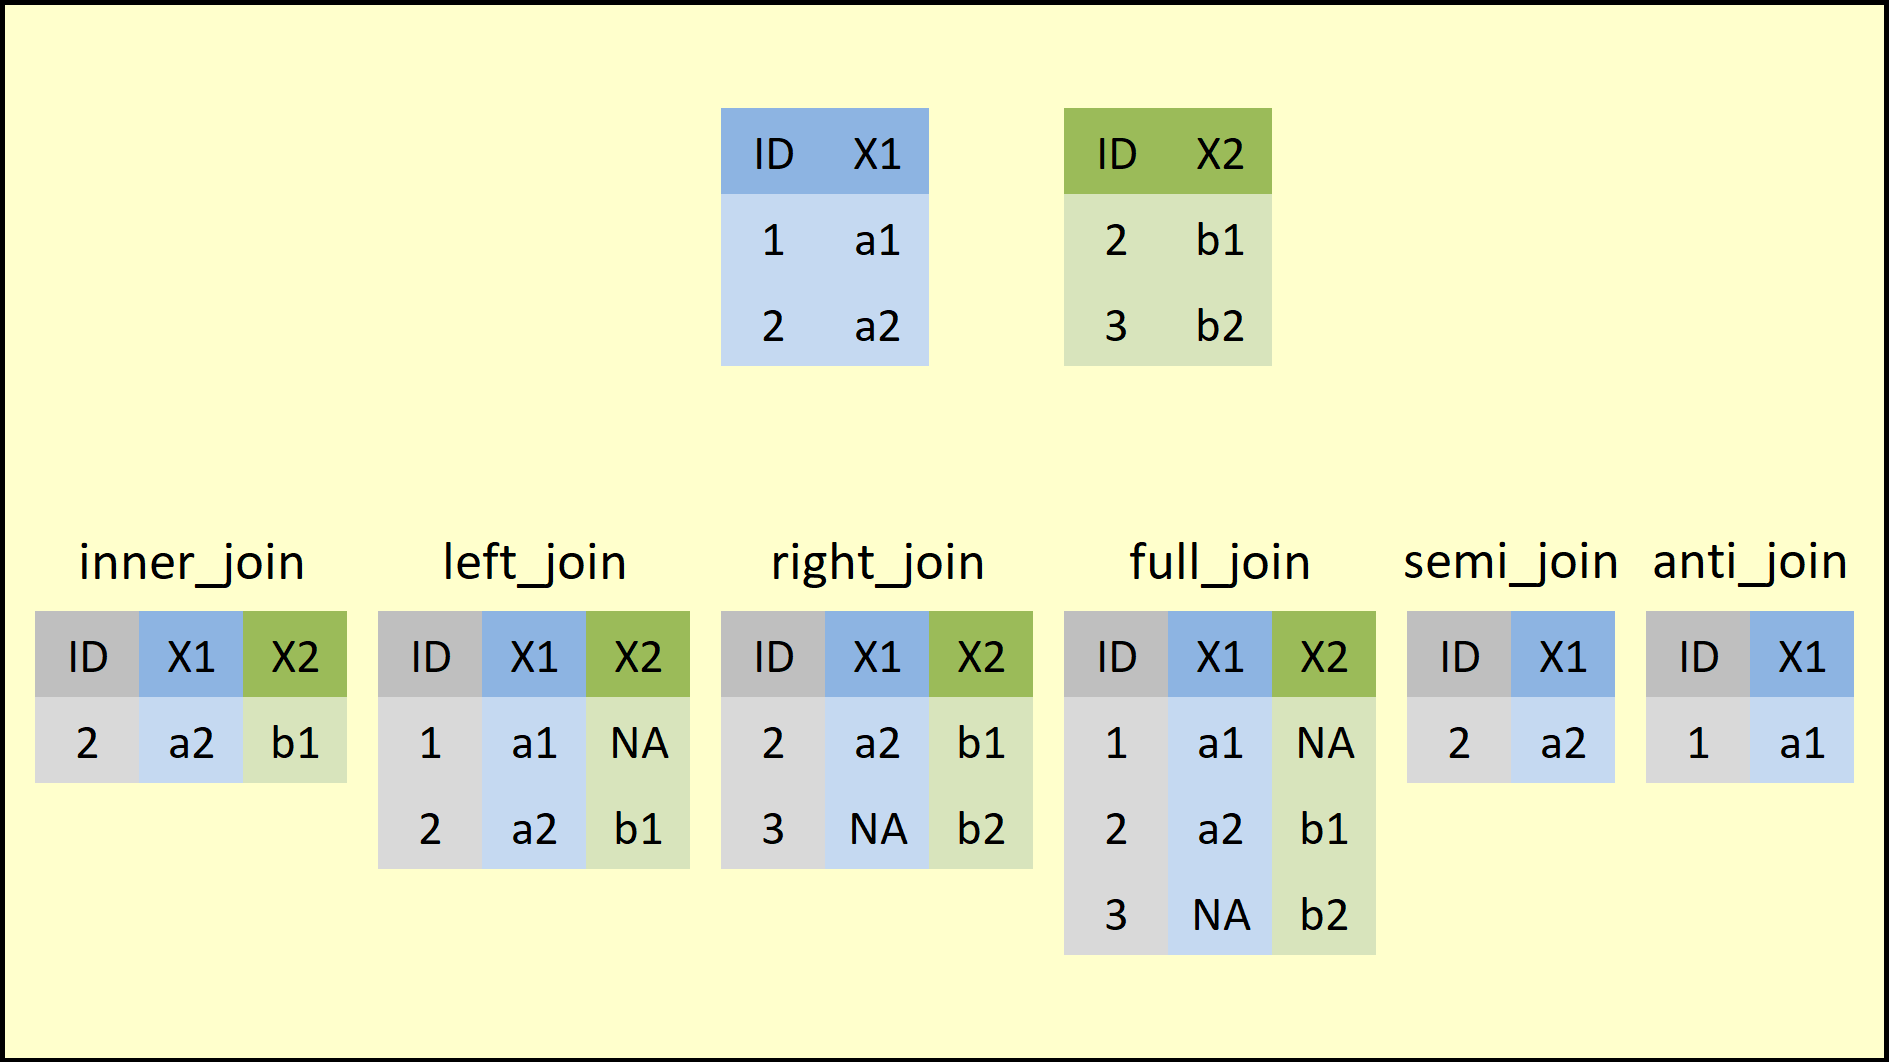

In [ ]:
base_final <- df_ti %>%
  inner_join(df, by ="fecha")
base_final

fecha,ti,demanda_int,cons_priv,cons_publ,inv_bruint,inv_bruf,inv_priv,inv_publ,export,import,pbi
<yearqtr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1993 Q1,59.1,37463,26753,4296,6413,5406,3960,1446,6622,5625,38459
1993 Q2,55.4,40591,27583,4475,8533,5724,4130,1594,7138,6082,41647
1993 Q3,53.2,40025,29633,4520,5871,6325,4682,1643,7028,6369,40684
1993 Q4,53.0,39746,29711,4272,5764,7686,5257,2430,8583,7025,41304
1994 Q1,53.5,41666,29221,3619,8826,7321,4885,2437,8762,7054,43374
1994 Q2,54.7,44852,31997,4431,8424,7774,5332,2443,9407,7549,46710
1994 Q3,56.5,43213,30627,5167,7419,9052,6962,2089,9979,8097,45094
1994 Q4,58.5,46606,32588,5868,8149,10205,7909,2296,9349,9089,46866
1995 Q1,61.0,47459,32192,5156,10110,9741,7397,2344,9508,9686,47280


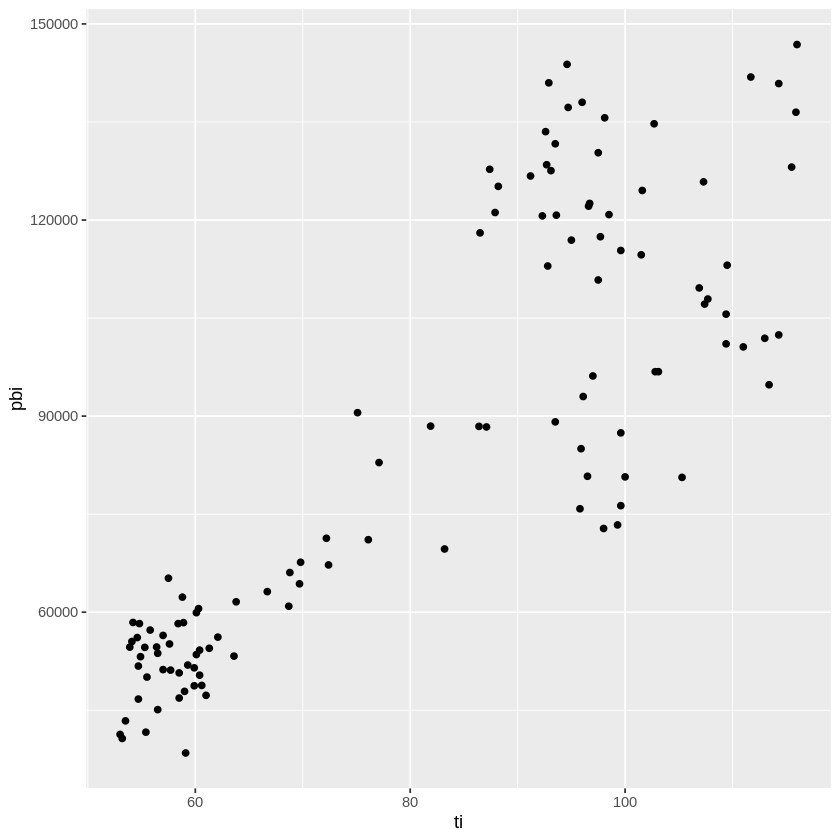

In [ ]:
# Muestra total: 1970-1995
ggplot(base_final,
      aes(ti,pbi)) + 
      geom_point()

In [ ]:
options(scipen=999)

In [ ]:
modelo <- lm(pbi ~ ti, base_final)
summary(modelo)


Call:
lm(formula = pbi ~ ti, data = base_final)

Residuals:
   Min     1Q Median     3Q    Max 
-36581  -9351  -2494  10314  40637 

Coefficients:
            Estimate Std. Error t value             Pr(>|t|)    
(Intercept) -20838.2     6425.6  -3.243              0.00155 ** 
ti            1311.0       76.7  17.093 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17260 on 114 degrees of freedom
Multiple R-squared:  0.7193,	Adjusted R-squared:  0.7169 
F-statistic: 292.2 on 1 and 114 DF,  p-value: < 0.00000000000000022


In [ ]:
install.packages("strucchange")
library(strucchange)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘sandwich’


Loading required package: sandwich


Attaching package: ‘strucchange’


The following object is masked from ‘package:stringr’:

    boundary




In [ ]:
cusum <- efp(pbi ~ ti, base_final, type = "Rec-CUSUM")
cusum$process
class(cusum$process)

A Time Series:
  [1]  0.00000000 -0.01058812 -0.01167162  0.00186636  0.03885474  0.06463631
  [7]  0.09738570  0.11750094  0.15989173  0.17374174  0.18728979  0.19744702
 [13]  0.23274344  0.27389916  0.30768930  0.31867907  0.35692308  0.35872679
 [19]  0.38928194  0.40223235  0.42446772  0.44781953  0.50081647  0.52930478
 [25]  0.60638577  0.65493374  0.71241242  0.75792489  0.83377621  0.87702823
 [31]  0.92226826  0.94146632  1.00786840  1.05306892  1.10275929  1.13342127
 [37]  1.21323082  1.26214033  1.31766252  1.36301691  1.45969906  1.51275489
 [43]  1.55814501  1.57370044  1.62379008  1.64952729  1.68016447  1.68929993
 [49]  1.72870714  1.73282363  1.73857402  1.69195238  1.63330699  1.56636425
 [55]  1.53317037  1.48933393  1.47772362  1.49038268  1.54879055  1.56949600
 [61]  1.66053002  1.77505165  1.95743989  2.07031366  2.19523789  2.28708980
 [67]  2.35854401  2.36666522  2.42223422  2.47174115  2.51133142  2.48094977
 [73]  2.50532713  2.52376253  2.61439197  2.63176653  2.71994890  2.82054979
 [79]  2.92468469  2.97073400  3.13082354  3.30307131  3.51728884  3.66046855
 [85]  3.86163172  4.04286528  4.26143694  4.43684467  4.66828957  4.93260064
 [91]  5.24492308  5.48920687  5.76870347  6.03218564  6.30889490  6.50086901
 [97]  6.75285905  6.97444371  7.18011758  7.31628784  7.55969423  7.83097634
[103]  8.14988794  8.36489563  8.63264332  8.89023456  9.19867030  9.32875224
[109]  9.26250616  9.31752583  9.44600838  9.43613583  9.48325322  9.57520465
[115]  9.69124610

[1] "ts"

In [ ]:
sctest(cusum)


	Recursive CUSUM test

data:  cusum
S = 3.2423, p-value < 0.00000000000000022


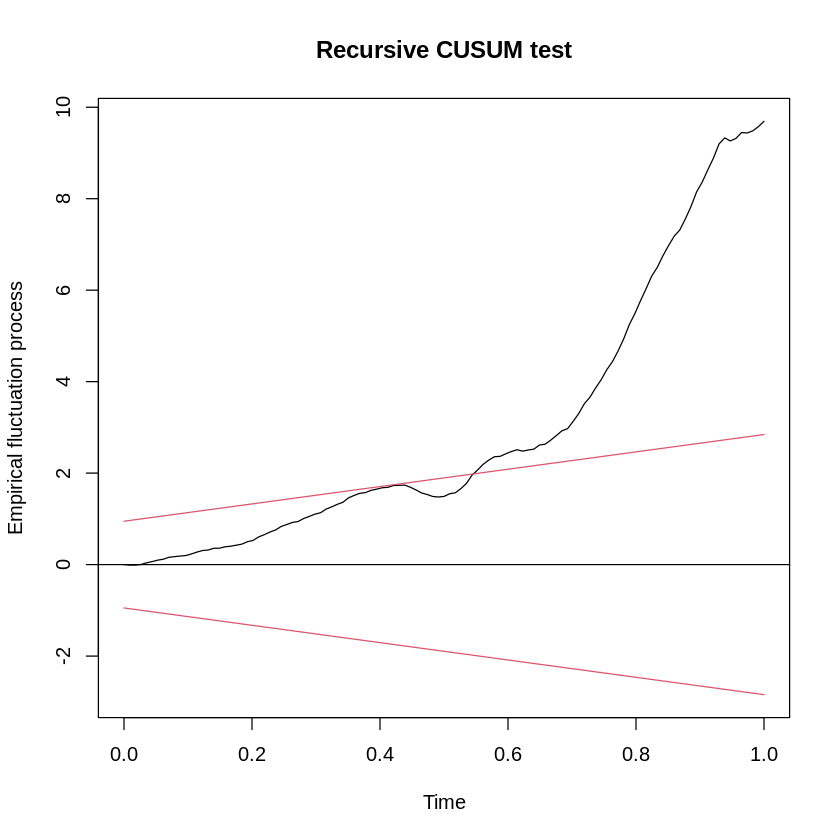

In [ ]:
plot(cusum)

In [ ]:
rcres <-recresid(pbi ~ ti, base_final)
rcres

[1] -1448.1838  -148.1942  1851.6482  5059.0614  3526.2583  4479.2769
  [7]  2751.2489  5797.9738  1894.3259  1853.0259  1389.2488  4827.6444
 [13]  5629.0479  4621.6246  1503.1183  5230.8004   246.7013  4179.1605
 [19]  1771.2841  3041.2283  3193.9296  7248.6226  3896.4706 10542.7018
 [25]  6640.1183  7861.6094  6224.9397 10374.5150  5915.7674  6187.6765
 [31]  2625.8015  9082.1023  6182.2718  6796.3689  4193.7721 10915.9013
 [37]  6689.5662  7594.0122  6203.3174 13223.6387  7256.6773  6208.2056
 [43]  2127.5833  6850.9780  3520.1914  4190.3798  1249.4965  5389.8962
 [49]   563.0303   786.5067 -6376.6450 -8021.1865 -9156.0503 -4540.0717
 [55] -5995.7005 -1587.9928  1731.4352  7988.6989  2831.9738 12451.1204
 [61] 15663.6220 24946.0355 15438.2369 17086.4311 12562.9870  9773.1038
 [67]  1110.7727  7600.4145  6771.2792  5414.9337 -4155.4317  3334.1983
 [73]  2521.4902 12395.7840  2376.3938 12061.0876 13759.6216 14242.9844
 [79]  6298.3645 21896.1444 23559.0784 29299.4662 19583.3130 27513.9628
 [85] 24788.1038 29894.9999 23991.2792 31655.7285 36150.9772 42717.7009
 [91] 33411.7591 38227.9687 36037.6048 37846.7322 26257.1358 34465.7762
 [97] 30307.0996 28130.9111 18624.6007 33291.7531 37104.4372 43618.9288
[103] 29407.5396 36621.0192 35231.8754 42186.1020 17791.8737 -9060.7653
[109]  7525.2795 17573.1193 -1350.3123  6444.4515 12576.5973 15871.4957

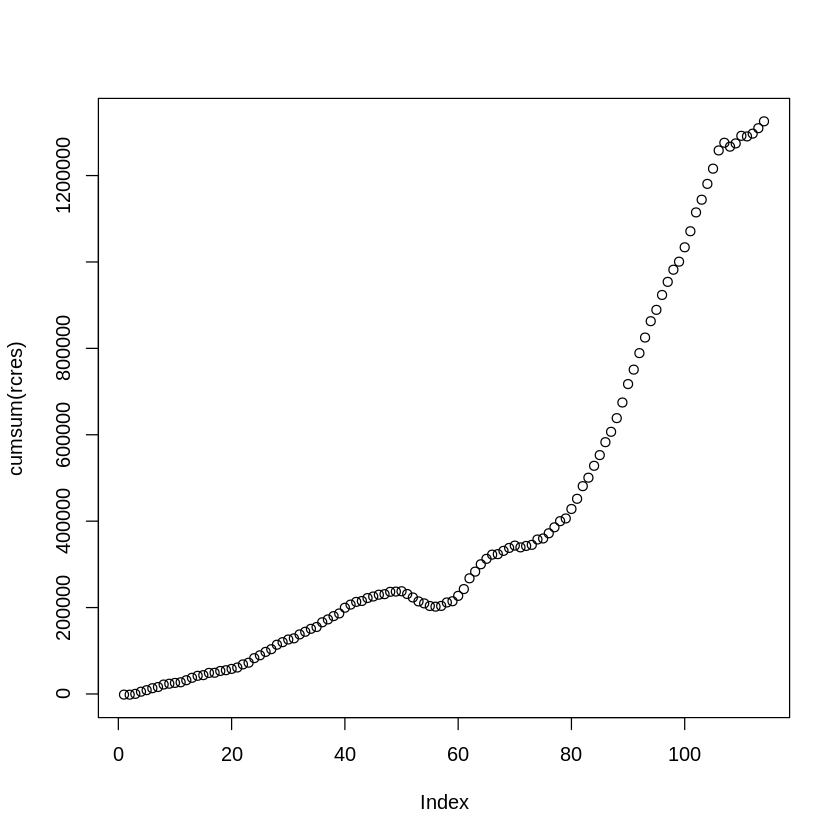

In [ ]:
plot(cumsum(rcres))

In [ ]:
N=length(rcres)
cumq=cumsum(rcres^2)/sum(rcres^2)
cumq

[1] 0.00006176463 0.00006241141 0.00016338537 0.00091714415 0.00128334615
  [6] 0.00187423841 0.00209716006 0.00308718235 0.00319286456 0.00329398884
 [11] 0.00335082864 0.00403720611 0.00497037954 0.00559942467 0.00566596405
 [16] 0.00647176686 0.00647355926 0.00698792329 0.00708032264 0.00735271223
 [21] 0.00765314213 0.00920054521 0.00964767674 0.01292105597 0.01421956243
 [26] 0.01603974687 0.01718094952 0.02035072194 0.02138138012 0.02250896092
 [31] 0.02271201712 0.02514122820 0.02626684008 0.02762717662 0.02814514368
 [36] 0.03165437241 0.03297229040 0.03467067114 0.03580395965 0.04095380786
 [41] 0.04250465179 0.04363972703 0.04377303792 0.04515532303 0.04552026603
 [46] 0.04603739545 0.04608337477 0.04693894031 0.04694827620 0.04696649406
 [51] 0.04816399802 0.05005882562 0.05252775585 0.05313479668 0.05419349527
 [56] 0.05426776119 0.05435604985 0.05623555959 0.05647175473 0.06103747548
 [61] 0.06826312459 0.08659030061 0.09360950481 0.10220746035 0.10685559071
 [66] 0.10966851149 0.10970484797 0.11140609365 0.11275640501 0.11361993766
 [71] 0.11412847725 0.11445587472 0.11464311834 0.11916834647 0.11933466065
 [76] 0.12361881809 0.12919459587 0.13516899830 0.13633728131 0.15045705623
 [81] 0.16680296502 0.19208499226 0.20337943499 0.22567398801 0.24376984230
 [86] 0.27009006674 0.28704122147 0.31655311682 0.35504175640 0.40878306253
 [91] 0.44165998529 0.48469826661 0.52294587767 0.56513002269 0.58543428321
 [96] 0.62041821391 0.64746908335 0.67077467188 0.68099033156 0.71363150836
[101] 0.75417714959 0.81020996818 0.83567884880 0.87517486846 0.91173131730
[106] 0.96414338258 0.97346595680 0.97588376721 0.97755154333 0.98664628129
[111] 0.98669997964 0.98792308649 0.99258129349 1.00000000000

In [ ]:
Af=0.948    # Cuantil del 95% para la estadística cusum
co=0.14422  # Valor del cuantil aproximado para cusumsq para n/2
LS=Af*sqrt(N)+2*Af*c(1:length(rcres))/sqrt(N)
LI=-LS
LQS=co+(1:length(rcres))/N
LQI=-co+(1:length(rcres))/N

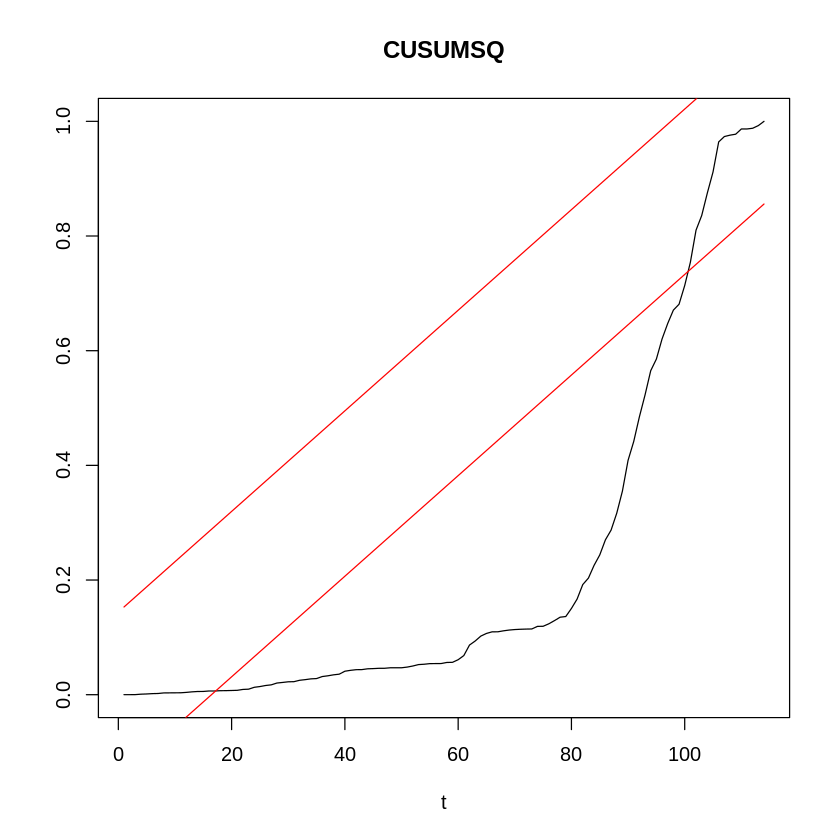

In [ ]:
# CUSUM cuadrado
plot(cumq,type="l",xlab="t",ylab="",main="CUSUMSQ")        
lines(LQS,type="l",col="red")                            
lines(LQI,type="l",col="red")

In [ ]:
sctest(base_final$pbi ~ base_final$ti, type = "Chow", point = 25)


	Chow test

data:  base_final$pbi ~ base_final$ti
F = 3.8576, p-value = 0.02398


In [ ]:
holi <- tibble(
  n   = 2+1:length(cumq),
  cusum2  = cumq,
  LQS = LQS,
  LQI = LQI
  )

holi2 <- tibble(
  n   = 1:length(base_final$fecha),
  fecha  = base_final$fecha
  )

holi3 <- holi2 %>%
    inner_join(holi, by="n")
holi3

n,fecha,cusum2,LQS,LQI
<dbl>,<yearqtr>,<dbl>,<dbl>,<dbl>
3,1993 Q3,0.00006176463,0.1529919,-0.135448070
4,1993 Q4,0.00006241141,0.1617639,-0.126676140
5,1994 Q1,0.00016338537,0.1705358,-0.117904211
6,1994 Q2,0.00091714415,0.1793077,-0.109132281
7,1994 Q3,0.00128334615,0.1880796,-0.100360351
8,1994 Q4,0.00187423841,0.1968516,-0.091588421
9,1995 Q1,0.00209716006,0.2056235,-0.082816491
10,1995 Q2,0.00308718235,0.2143954,-0.074044561
11,1995 Q3,0.00319286456,0.2231674,-0.065272632


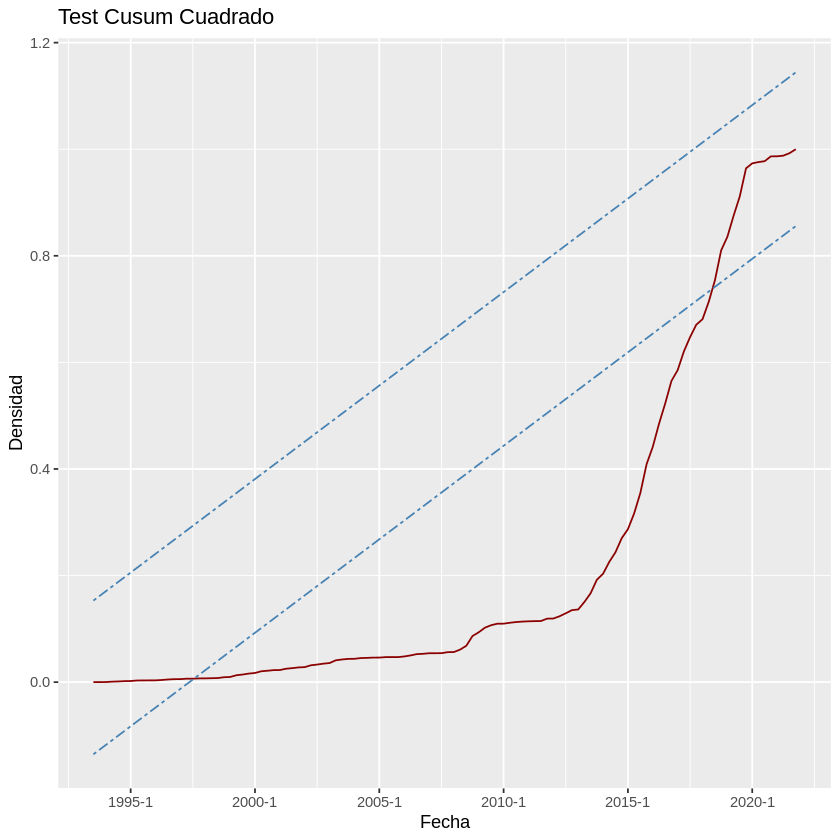

In [ ]:
ggplot(holi3, aes(x=fecha)) + 
  geom_line(aes(y=cusum2), color="darkred") +
  geom_line(aes(y=LQI), color="steelblue", linetype="twodash") +
  geom_line(aes(y=LQS), color="steelblue", linetype="twodash") +
  ggtitle("Test Cusum Cuadrado") +
  xlab("Fecha") + ylab("Densidad")